<a href="https://colab.research.google.com/github/yunpengliDataScience/Skin_Cancer_ML_DL/blob/main/Skin_Cancer_Analysis/ML_Codes_nww_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import sys
import os
from imageio import imread
from PIL import Image
from glob import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn import preprocessing

**Mout google drive:**




In [96]:
from google.colab import drive
drive.mount('/content/gdrive') 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Create project root path:**

In [97]:
project_root_path_string = '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/'

print("project_root_path_string:", project_root_path_string)

project_root_path_string: /content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/


In [98]:
sys.path.append(project_root_path_string)

sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/',
 '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/']

**Get the root data directory:**

In [99]:
data_root_path = os.path.join(project_root_path_string, 'data') 

print("data_root_path:", data_root_path)

data_root_path: /content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data


**Get the raw image data directory:**

In [100]:
raw_data_path =  os.path.join(data_root_path, 'raw_image_data') 
print("raw_data_path:", raw_data_path)

raw_data_path: /content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/raw_image_data


**Get the tabular data path:**

In [101]:
tabular_data_path = os.path.join(data_root_path, 'tabular_data') 

print("tabular_data_path:", tabular_data_path)

tabular_data_path: /content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/tabular_data


**Read metadata into a panda data frame:**

In [102]:
metaData_pd = pd.read_csv(os.path.join(tabular_data_path, 'metadata.csv'))

In [103]:
metaData_pd.head()

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,region,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARM,NaN,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,True,True,True,3.0,NECK,6.0,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FACE,NaN,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HAND,NaN,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,False,False,False,1.0,FOREARM,5.0,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True


**Summarize NaN values:**

In [104]:
count_nan_in_df = metaData_pd.isnull().sum()
print (count_nan_in_df)

patient_id               0
lesion_id                0
smoke                  804
drink                  804
background_father      818
background_mother      822
age                      0
pesticide              804
gender                 804
skin_cancer_history    804
cancer_history         804
has_piped_water        804
has_sewage_system      804
fitspatrick            804
region                   0
diameter_1             804
diameter_2             804
diagnostic               0
itch                     0
grew                     0
hurt                     0
changed                  0
bleed                    0
elevation                0
img_id                   0
biopsed                  0
dtype: int64


**Visualize skin leison category size:**

Text(0.5, 1.02, 'Number of image by cancer diagnosis type')

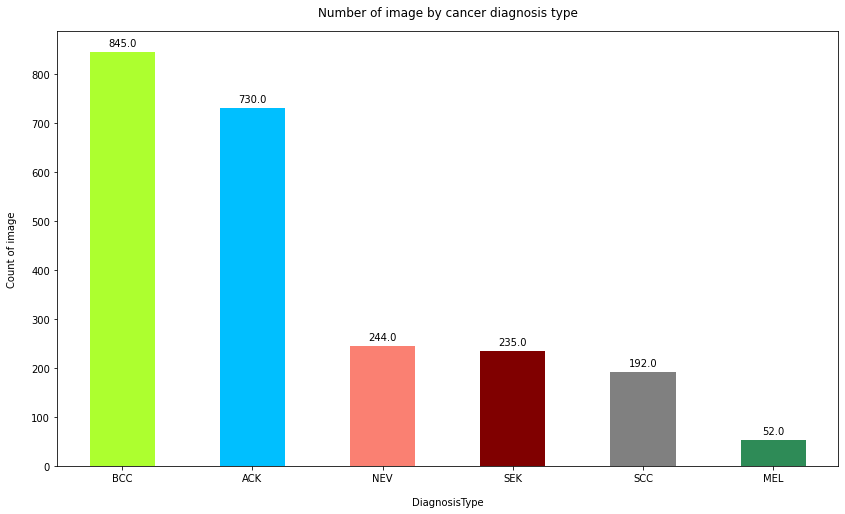

In [105]:
colors = ['#ADFF2F','#00BFFF','#FA8072','#800000','#808080','#2E8B57']
plt.figure(figsize=(8, 6))
splot=metaData_pd['diagnostic'].value_counts().plot(kind='bar', figsize=(14, 8), rot=0, color=colors)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("DiagnosisType", labelpad=14)
plt.ylabel("Count of image", labelpad=14)

plt.title("Number of image by cancer diagnosis type", y=1.02)




In [106]:
##The dataset contains 1342 images whith true biopsy
metaData_pd.groupby('biopsed').size()

biopsed
False     956
True     1342
dtype: int64

In [107]:
## 58.3% of the images have true biopse

(metaData_pd.groupby('biopsed').size()/metaData_pd['biopsed'].count())*100

biopsed
False    41.601393
True     58.398607
dtype: float64

In [108]:
pip install dython

In [109]:
### remove the id columns as since it is not important to field to train a model
metaData_pd = metaData_pd.drop(columns=['patient_id','img_id','lesion_id'])

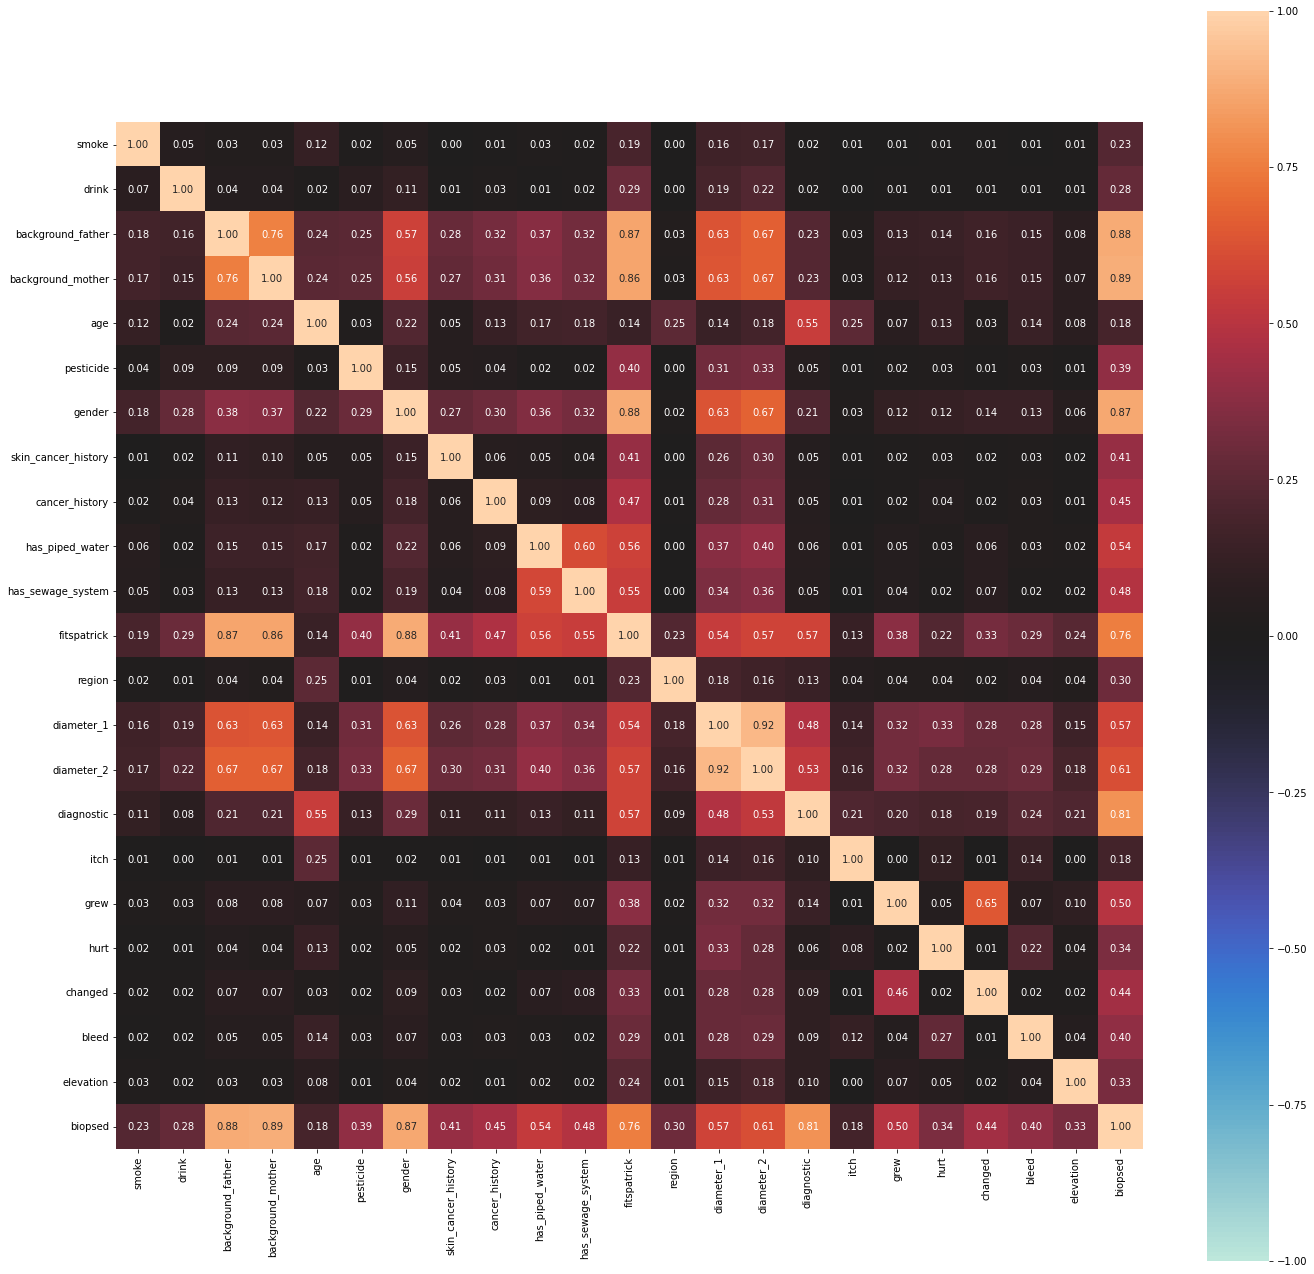

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f484d529d10>,
 'corr':                         smoke     drink  ...  elevation   biopsed
 smoke                1.000000  0.047988  ...   0.012023  0.233957
 drink                0.070920  1.000000  ...   0.013130  0.279479
 background_father    0.175912  0.164739  ...   0.076435  0.882316
 background_mother    0.173884  0.152216  ...   0.070595  0.886191
 age                  0.124379  0.022552  ...   0.075356  0.181797
 pesticide            0.038114  0.093504  ...   0.009954  0.391303
 gender               0.175981  0.279381  ...   0.062442  0.869192
 skin_cancer_history  0.005986  0.018124  ...   0.015425  0.406600
 cancer_history       0.018919  0.038483  ...   0.013793  0.449624
 has_piped_water      0.058185  0.021356  ...   0.024273  0.536637
 has_sewage_system    0.047004  0.026851  ...   0.022138  0.484994
 fitspatrick          0.190476  0.294157  ...   0.240616  0.756666
 region               0.016836  0.009760  ...   0.03754

In [110]:
##Correlation matrix£#‹
from dython.nominal import associations
num_cols = len(metaData_pd.columns)
associations(metaData_pd, nom_nom_assoc='theil', figsize=(num_cols, num_cols))

Creating a new Category (unknown) for missing values.Advantage: Simple and easy to implement for categorical variables/columns and preserves the variance. 34% of missing values from in 13 columns.
Doesn’t give good results when missing data is a high percentage of the data.

In [111]:
# categorical features check
cat =metaData_pd.select_dtypes(include='O').keys()
cat

Index(['smoke', 'drink', 'background_father', 'background_mother', 'pesticide',
       'gender', 'skin_cancer_history', 'cancer_history', 'has_piped_water',
       'has_sewage_system', 'region', 'diagnostic', 'itch', 'grew', 'hurt',
       'changed', 'bleed', 'elevation'],
      dtype='object')

In [112]:
# replace the missing for data categorical variable based on the mode function. most frequent value.
cat_columns = metaData_pd[['smoke', 'drink', 'background_father', 'background_mother', 'pesticide',
       'gender', 'skin_cancer_history', 'cancer_history', 'has_piped_water',
       'has_sewage_system', 'region', 'itch', 'grew', 'hurt',
       'changed', 'bleed', 'elevation','biopsed']]
#imputing the null values in numerical columns with mean
for column in cat_columns.columns:
    cat_columns[column].fillna(cat_columns[column].mode()[0], inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [113]:
metaData_le= cat_columns
##numeric features impute mean values for nan
#Taking care of Missing data
col=metaData_pd[['age','fitspatrick','diameter_1','diameter_2']]
from sklearn.impute import SimpleImputer  
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(col)
###merge the numeric fields to the categorical fields
metaData_le[['age','fitspatrick','diameter_1','diameter_2']]= imputer.transform(col)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [114]:
metaData_le=metaData_le.join(metaData_pd['diagnostic'])
metaData_le.head()

,smoke,drink,background_father,background_mother,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,region,itch,grew,hurt,changed,bleed,elevation,biopsed,age,fitspatrick,diameter_1,diameter_2,diagnostic
0,False,False,POMERANIA,POMERANIA,False,FEMALE,False,True,True,True,ARM,False,False,False,False,False,False,False,8.0,2.26573,11.897055,8.852209,NEV
1,False,False,POMERANIA,POMERANIA,False,FEMALE,True,True,True,True,NECK,True,True,False,True,True,True,True,55.0,3.00000,6.000000,5.000000,BCC
2,False,False,POMERANIA,POMERANIA,False,FEMALE,False,True,True,True,FACE,True,False,False,False,False,False,False,77.0,2.26573,11.897055,8.852209,ACK
3,False,False,POMERANIA,POMERANIA,False,FEMALE,False,True,True,True,HAND,True,False,False,False,False,False,False,75.0,2.26573,11.897055,8.852209,ACK
4,False,True,POMERANIA,POMERANIA,False,MALE,True,False,False,False,FOREARM,True,True,False,False,True,True,True,79.0,1.00000,5.000000,5.000000,BCC


**Appending the numerical variables.**

In [115]:
metaData_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   smoke                2298 non-null   bool   
 1   drink                2298 non-null   bool   
 2   background_father    2298 non-null   object 
 3   background_mother    2298 non-null   object 
 4   pesticide            2298 non-null   bool   
 5   gender               2298 non-null   object 
 6   skin_cancer_history  2298 non-null   bool   
 7   cancer_history       2298 non-null   bool   
 8   has_piped_water      2298 non-null   bool   
 9   has_sewage_system    2298 non-null   bool   
 10  region               2298 non-null   object 
 11  itch                 2298 non-null   object 
 12  grew                 2298 non-null   object 
 13  hurt                 2298 non-null   object 
 14  changed              2298 non-null   object 
 15  bleed                2298 non-null   o

In [116]:
# le = preprocessing.LabelEncoder()
# metaData_df['target']=metaData_pd.fit_transform(metaData_pd['diagnostic'])

In [117]:
# adding the target class
# metaData_df= cat_columns
# metaData_df['target']=metaData_pd.fit_transform(metaData_pd['diagnostic'])

In [118]:
# le.classes_

**Data prep for chi square test and correlation**                           
split data to X and y for chi square test and step wise regression to identify the best predictor variables

In [119]:
# ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
data_enc = encoder.fit_transform(metaData_le)
# y_enc= encoder.fit_transform(y2.dropna())

In [120]:
data_enc

array([[ 0.,  0.,  9., ..., 13., 10.,  3.],
       [ 0.,  0.,  9., ...,  7.,  6.,  1.],
       [ 0.,  0.,  9., ..., 13., 10.,  0.],
       ...,
       [ 0.,  0.,  9., ..., 13., 10.,  5.],
       [ 0.,  0.,  9., ...,  6.,  5.,  1.],
       [ 0.,  0.,  9., ..., 13., 10.,  5.]])

In [121]:
###Getting column header
y2=metaData_le[['diagnostic']]
x2=metaData_le.drop(columns=['diagnostic'])

**Creating a dataframe from the encoded numpy array "x" an "y"**

In [122]:
x_enc = pd.DataFrame(data=data_enc[:, :-1], columns=x2.columns) # for all but last column
y_enc = pd.DataFrame(data=data_enc[:, -1], columns=y2.columns)# for last column

In [123]:
x_enc.shape

(2298, 22)

In [124]:
from sklearn.feature_selection import SelectKBest, chi2 

sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(x_enc, y_enc)
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (x_enc.columns[i], sf_fit.scores_[i]))

 smoke: 129.364969
 drink: 124.056784
 background_father: 259.449196
 background_mother: 387.070310
 pesticide: 217.131971
 gender: 254.365572
 skin_cancer_history: 215.465226
 cancer_history: 88.942515
 has_piped_water: 58.949159
 has_sewage_system: 82.074732
 region: 105.452255
 itch: 232.420979
 grew: 537.236444
 hurt: 276.618891
 changed: 629.976932
 bleed: 427.057099
 elevation: 233.440734
 biopsed: 623.995996
 age: 3448.582874
 fitspatrick: 71.561837
 diameter_1: 67.381549
 diameter_2: 73.623881


**Stepwise regression is a way to build a model by adding or removing predictor variables, usually via a series of F-tests or T-tests. The variables to be added or removed are chosen based on the test statistics of the estimated coefficients.**

Start the test with no predictor variables (the “Forward” method), adding one at a time as the regression model progresses. If you have a large set of predictor variables, use this method.

In [125]:
import statsmodels.api as sm

# # Stepwise regression
def get_stats():
    results = sm.OLS(y_enc, x_enc).fit()
    print(results.summary())
get_stats()


# Stepwise regression Foraward and backward

def forward_regression(X, Y,
                       threshold_in
                      ):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded,dtype='float64')
        for new_column in excluded:
            model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
    
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            
            print('Included variables  {:30} with p-value {:.6}'.format(best_feature,format( best_pval,'.4f')))

        if not changed:
            break

    return included


forward_regression(X=x_enc,Y=y_enc,threshold_in=0.05)

                                 OLS Regression Results                                
Dep. Variable:             diagnostic   R-squared (uncentered):                   0.597
Model:                            OLS   Adj. R-squared (uncentered):              0.594
Method:                 Least Squares   F-statistic:                              153.5
Date:                Sat, 23 Oct 2021   Prob (F-statistic):                        0.00
Time:                        15:29:37   Log-Likelihood:                         -4133.1
No. Observations:                2298   AIC:                                      8310.
Df Residuals:                    2276   BIC:                                      8436.
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

['itch',
 'elevation',
 'grew',
 'biopsed',
 'region',
 'age',
 'bleed',
 'changed',
 'drink']

Start the test with all available predictor variables (the “Backward: method), deleting one variable at a time as the regression model progresses. Use this method if you have a modest number of predictor variables and you want to eliminate a few. 

In [126]:
metaData_le.columns

Index(['smoke', 'drink', 'background_father', 'background_mother', 'pesticide',
       'gender', 'skin_cancer_history', 'cancer_history', 'has_piped_water',
       'has_sewage_system', 'region', 'itch', 'grew', 'hurt', 'changed',
       'bleed', 'elevation', 'biopsed', 'age', 'fitspatrick', 'diameter_1',
       'diameter_2', 'diagnostic'],
      dtype='object')

In [127]:

def backward_regression(X, Y,
                           threshold_out
                           ):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        
        if worst_pval > threshold_out:
            #print(worst_pval)
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            print('Removed variable {:30} with p-value {:.6}'.format(worst_feature, format(worst_pval, '.4f')))
        if not changed:
            break
    return included

backward_regression(X=x_enc,Y=y_enc,threshold_out=.05)


Removed variable has_sewage_system              with p-value 0.8566
Removed variable background_father              with p-value 0.8113
Removed variable gender                         with p-value 0.6862
Removed variable diameter_1                     with p-value 0.6645
Removed variable hurt                           with p-value 0.6348
Removed variable skin_cancer_history            with p-value 0.4198
Removed variable background_mother              with p-value 0.3367
Removed variable has_piped_water                with p-value 0.3601
Removed variable fitspatrick                    with p-value 0.1909
Removed variable smoke                          with p-value 0.1446
Removed variable cancer_history                 with p-value 0.0891
Removed variable diameter_2                     with p-value 0.0934
Removed variable pesticide                      with p-value 0.0577


['drink',
 'region',
 'itch',
 'grew',
 'changed',
 'bleed',
 'elevation',
 'biopsed',
 'age']

**Data preprocessing for Machine Learning**

**The best predictors we will take for model development are: age, biopsed, grew, region, pesticide, skin_cancer_history, cancer_history, background_father, drink, smoke, itch, bleed, changed, has_sewage_system, elevation**

In [128]:
#dropping all the unwanted columns from the encoded dataframe
#dropping background_mother, gender, has_piped_water, hurt, fitspatrick, diameter1, diameter_2
data_enc=np.delete(data_enc,[3,5,8,13,20,21],axis=1)

In [129]:
feature_names=['smoke', 'drink', 'background_father', 'pesticide',
        'skin_cancer_history', 'cancer_history',
       'has_sewage_system', 'region', 'itch', 'grew', 'changed',
       'bleed', 'elevation', 'biopsed', 'age','fitspatrick','diagnostic']

In [130]:
data_enc

array([[ 0.,  0.,  9., ...,  1.,  2.,  3.],
       [ 0.,  0.,  9., ..., 45.,  3.,  1.],
       [ 0.,  0.,  9., ..., 67.,  2.,  0.],
       ...,
       [ 0.,  0.,  9., ..., 64.,  2.,  5.],
       [ 0.,  0.,  9., ..., 48.,  3.,  1.],
       [ 0.,  0.,  9., ..., 31.,  2.,  5.]])

In [131]:
data_enc.shape

(2298, 17)

In [132]:
X = data_enc[:, :-1]
Y = data_enc[:, -1]
Target_Names=['ACK', 'BCC', 'MEL', 'NEV', 'SCC', 'SEK']

In [133]:
# Normalize data
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)
print(scaled)

[[-0.31044169 -0.43666185  0.61113095 ... -1.18480618 -3.13566166
   0.29046167]
 [-0.31044169 -0.43666185  0.61113095 ...  0.8440199  -0.34828433
   1.34660234]
 [-0.31044169 -0.43666185  0.61113095 ... -1.18480618  1.04540434
   0.29046167]
 ...
 [-0.31044169 -0.43666185  0.61113095 ... -1.18480618  0.85535588
   0.29046167]
 [-0.31044169 -0.43666185  0.61113095 ...  0.8440199  -0.15823588
   1.34660234]
 [-0.31044169 -0.43666185  0.61113095 ... -1.18480618 -1.23517712
   0.29046167]]


In [134]:
#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [135]:
from sklearn.linear_model import SGDClassifier 
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import scale

In [136]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [137]:
sgd_pred=sgd_clf.predict(X_test)
score = accuracy_score(Y_test, sgd_pred)
print("Test score: ", score) 


Test score:  0.3760869565217391


In [138]:
Y_pred_sgd = sgd_clf.predict(X_test)
y_unique = np.unique(Y_test)
cm = confusion_matrix(Y_test, Y_pred_sgd)
print(cm)
# cm = multilabel_confusion_matrix(Y_test, Y_pred, labels = y_unique)
# cm

[[103   0  45   2   0   3]
 [  3   5 164   0   0   0]
 [  0   0  13   0   0   0]
 [  3   0   6  30   0  11]
 [  3   1  28   0   0   0]
 [  9   0   9   0   0  22]]


Text(69.0, 0.5, 'Predicted label')

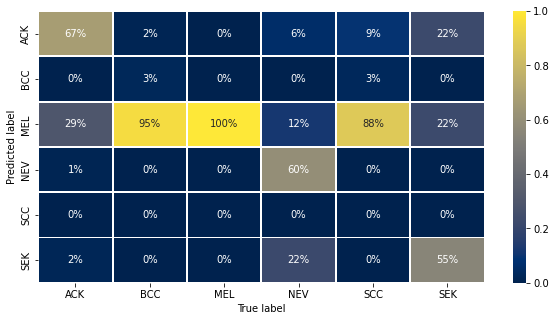

In [139]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Create the confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred_sgd, normalize="true")
# Plot the confusion matrix
plt.subplots(figsize=(10,5))
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis", xticklabels=Target_Names, yticklabels=Target_Names,linewidths=1)
plt.xlabel("True label")
plt.ylabel("Predicted label")

In [140]:
cr = classification_report(Y_test, Y_pred_sgd)
print(cr)

              precision    recall  f1-score   support

         0.0       0.85      0.67      0.75       153
         1.0       0.83      0.03      0.06       172
         2.0       0.05      1.00      0.09        13
         3.0       0.94      0.60      0.73        50
         4.0       0.00      0.00      0.00        32
         5.0       0.61      0.55      0.58        40

    accuracy                           0.38       460
   macro avg       0.55      0.48      0.37       460
weighted avg       0.75      0.38      0.40       460



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier())
ovr_clf = OneVsRestClassifier(SGDClassifier())

In [142]:
ovo_clf.fit(X_train, Y_train)
ovo_pred=ovo_clf.predict(X_test)

In [143]:
OVO_score = accuracy_score(Y_test, ovo_pred)
print("Test score: ", OVO_score) 

Test score:  0.4282608695652174


In [144]:
cr = classification_report(Y_test, ovo_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.89      0.54      0.67       153
         1.0       0.90      0.16      0.28       172
         2.0       0.00      0.00      0.00        13
         3.0       0.93      0.54      0.68        50
         4.0       0.13      0.97      0.22        32
         5.0       0.49      0.72      0.59        40

    accuracy                           0.43       460
   macro avg       0.56      0.49      0.41       460
weighted avg       0.79      0.43      0.47       460



Text(0.5, 1.0, 'OVO_confusion_Matrix')

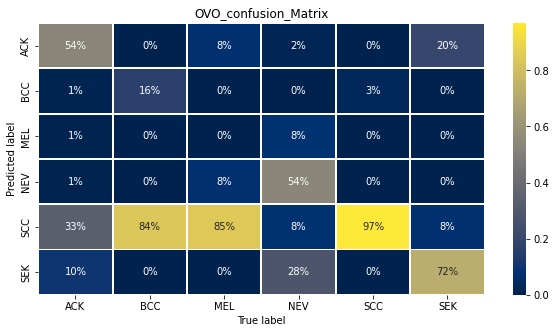

In [145]:

# Create the confusion matrix
conf_mat = confusion_matrix(Y_test, ovo_pred, normalize="true")
# Plot the confusion matrix
plt.subplots(figsize=(10,5))
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis", xticklabels=Target_Names, yticklabels=Target_Names,linewidths=1)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.title('OVO_confusion_Matrix')

In [188]:
#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [189]:
Y_pred_rf=rf_clf.predict_proba(X_test)

In [190]:

rf_testScore=rf_clf.score(X_test,Y_test)
print('rf_testscore is :',rf_testScore)

rf_testscore is : 0.8330434782608696


In [192]:
Y_pred_rf = np.argmax(Y_pred_rf,axis=1)
# Y_test= np.argmax(Y_test.reshape(1,-1),axis=0)

Random Forest*_testscore is : 83.30434782608695


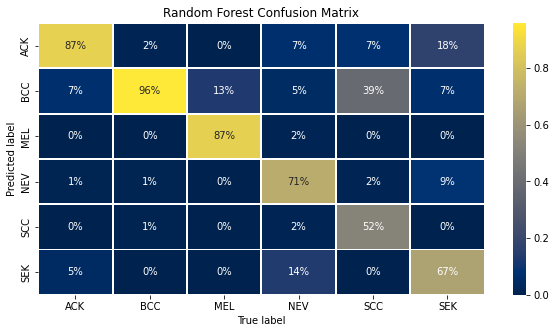

In [204]:
# Y_pred_rf = np.argmax(Y_pred_rf,axis=1)
# Y_test= np.argmax(Y_test,axis=1)
# Create the confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred_rf, normalize="true")
# Plot the confusion matrix
plt.subplots(figsize=(10,5))
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis", xticklabels=Target_Names, yticklabels=Target_Names,linewidths=1)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.title('Random Forest Confusion Matrix')
print('Random Forest*_testscore is :',rf_testScore*100)

In [194]:
# x_enc = pd.DataFrame(data=data_enc[:, :-1], columns=x2.columns) # for all but last column
# y_enc = pd.DataFrame(data=data_enc[:, -1], columns=y2.columns)# for last column

In [195]:
feature_names= pd.DataFrame(data=X, columns=feature_names[:16])

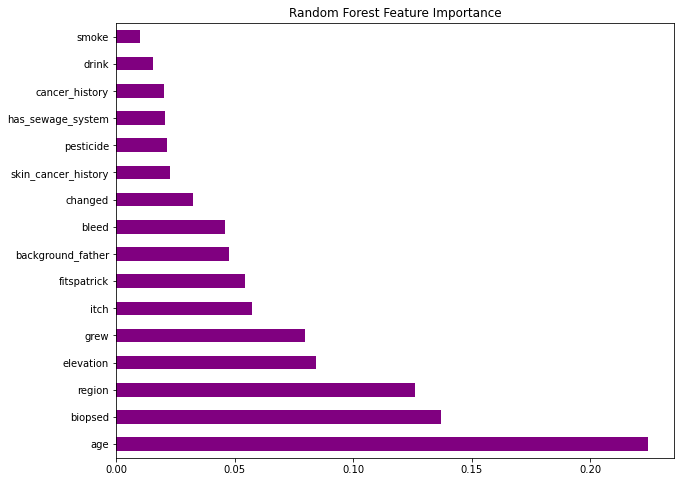

In [196]:
feat_importances = pd.Series(rf_clf.feature_importances_, index=feature_names.columns)
feat_importances.nlargest(24).plot(kind='barh',title='Random Forest Feature Importance',color='purple',figsize=(10, 8))

In [197]:
#split dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)
# decision tree classification problem
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define the model
dt_clf = DecisionTreeClassifier(random_state=42)
# fit the model
dt_clf.fit(X_train, Y_train)
pred_dt=dt_clf.predict(X_test)

dt_Testscore=accuracy_score(Y_test,pred_dt)

print('DT test score',dt_Testscore)


DT test score 0.7791304347826087


Decision Tree test score 77.91304347826087


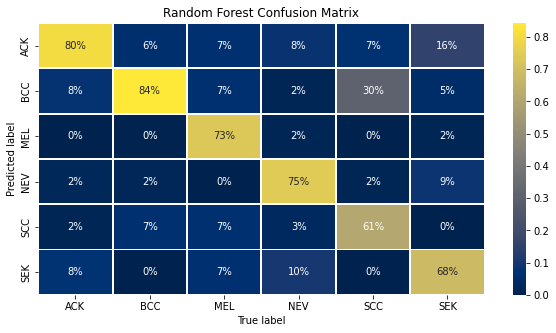

In [202]:

# Create the confusion matrix
conf_mat = confusion_matrix(Y_test, pred_dt, normalize="true")
# Plot the confusion matrix
plt.subplots(figsize=(10,5))
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis", xticklabels=Target_Names, yticklabels=Target_Names,linewidths=1)
plt.xlabel("True label")
plt.ylabel("Predicted label")

plt.title('Random Forest Confusion Matrix')
print('Decision Tree test score',dt_Testscore*100)

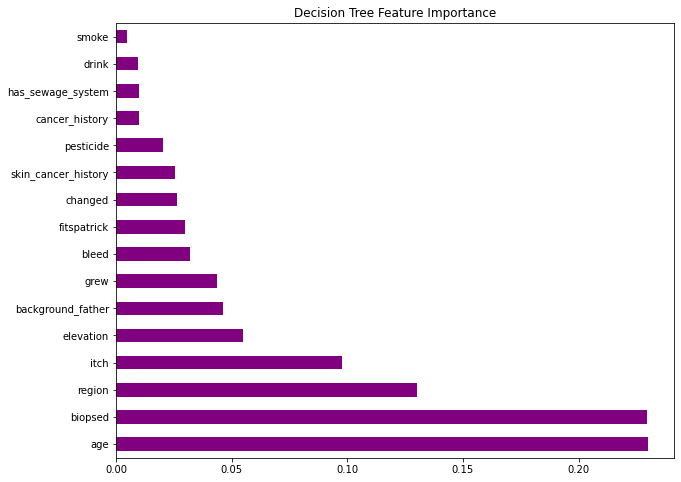

In [199]:
# get important features for decision tree clasifier
importance = dt_clf.feature_importances_
# summarize feature importance
feature_importances = pd.Series(dt_clf.feature_importances_ , index=feature_names.columns)
feature_importances.nlargest(20).plot(kind='barh',title='Decision Tree Feature Importance',color='purple',figsize=(10, 8))

In [205]:
#split dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [206]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
# Create a pipeline
nb_clf = make_pipeline(MultinomialNB(alpha=1))

In [207]:
# Fit the model with training set
nb_clf.fit(X_train, Y_train)
#Predict labels for the test set
labels = nb_clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, labels))

Accuracy: 0.6847826086956522


After fitting the model with the training set and predicting the labels for the test set, we can plot the confusion matrix to evaluate our model.

Text(0.5, 1.0, 'MultinomialNB Confusion Matrix')

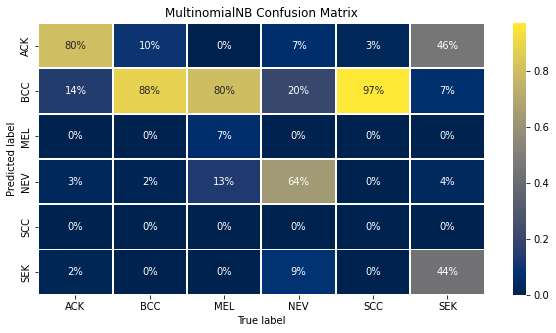

In [208]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Create the confusion matrix
conf_mat = confusion_matrix(Y_test, labels, normalize="true")
# Plot the confusion matrix
plt.subplots(figsize=(10,5))
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis", xticklabels=Target_Names, yticklabels=Target_Names,linewidths=1)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.title('MultinomialNB Confusion Matrix')